In [1]:
import rebound
import reboundxf
import numpy as np
sim = rebound.Simulation()
sim.G = 4.*(np.pi)**2
sim.integrator = 'whfast'
sim.dt = 0.012
sim.add(m=1.0)
sim.add(m=1.e-8, a=1.0, e=0.0, anom = 0)
sim.add(m=1.e-5, a=2.1**(2.0/3.0), e=0.0, anom = 0)
sim.move_to_com()
tmax = 1.e6
sim.post_timestep_modifications = reboundxf.modify_elements()
taues = [0., 1.e5, 100.]
tauas = [0., 1.e10, 1.e7]
taupo = [0., 1.e5, 100.]
reboundxf.set_e_damping_p(1.)
reboundxf.set_e_damping(taues)
reboundxf.set_peri_precession(taupo)
reboundxf.set_migration(tauas)

In [2]:
print(type(sim.simulation.contents.G))

<class 'float'>


In [3]:
o1 = sim.particles[1].calculate_orbit(sim)

In [4]:
o = sim.calculate_orbits()

In [5]:
Nout = 1000
pratio = np.zeros(Nout)
a1 = np.zeros(Nout)
a2 = np.zeros(Nout)
e1 = np.zeros(Nout)
e2 = np.zeros(Nout)
po1 = np.zeros(Nout)
po2 = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
ps = sim.particles

In [6]:
for i, time in enumerate(times):
    sim.integrate(time)
    o1 = ps[1].calculate_orbit(sim)
    o2 = ps[2].calculate_orbit(sim)
    a1[i] = o1.a
    a2[i] = o2.a
    e1[i] = o1.e
    e2[i] = o2.e
    po1[i] = o1.Omega + o1.omega
    po2[i] = o2.Omega + o2.omega
    pratio[i] = o2.P/o1.P

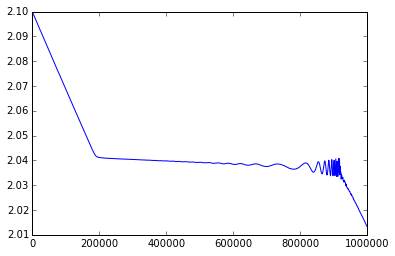

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times,pratio)

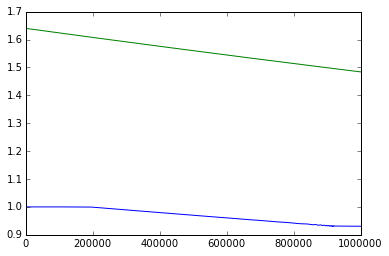

In [8]:
plt.plot(times,a1)
plt.plot(times,a2)

In [9]:
o = sim.calculate_orbits()